In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns",100)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2023-01-18 11:14:04.609345: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df=pd.read_csv("failure.csv")

In [3]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [4]:
df.tail()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0
124493,2015-11-02,Z1F0QLC1,0,17572840,0,0,0,10,351431,0,0,0


In [37]:
df.columns

Index(['failure', 'attribute1', 'attribute2', 'attribute3', 'attribute4',
       'attribute5', 'attribute6', 'attribute7', 'attribute9', 'month',
       ...
       'device_Z1F1HSWK', 'device_Z1F1Q9BD', 'device_Z1F1R76A',
       'device_Z1F1RE71', 'device_Z1F1RJFA', 'device_Z1F1VMZB',
       'device_Z1F1VQFY', 'device_Z1F26YZB', 'device_Z1F282ZV',
       'device_Z1F2PBHX'],
      dtype='object', length=1178)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [7]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [8]:
df.shape

(124494, 12)

In [9]:
df.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [11]:
df.corr()   #eksi olanlar icin arasinda bir iliski yok ama arti varsa bir iliski var demektir.

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
failure,1.000000,0.001984,0.052902,-0.000948,0.067398,0.002270,-0.000550,0.119055,0.119055,0.001622
attribute1,0.001984,1.000000,-0.004248,0.003702,0.001837,-0.003370,-0.001516,0.000151,0.000151,0.001122
attribute2,0.052902,-0.004248,1.000000,-0.002617,0.146593,-0.013999,-0.026350,0.141367,0.141367,-0.002736
attribute3,-0.000948,0.003702,-0.002617,1.000000,0.097452,-0.006696,0.009027,-0.001884,-0.001884,0.532366
attribute4,0.067398,0.001837,0.146593,0.097452,1.000000,-0.009773,0.024870,0.045631,0.045631,0.036069
attribute5,0.002270,-0.003370,-0.013999,-0.006696,-0.009773,1.000000,-0.017051,-0.009384,-0.009384,0.005949
attribute6,-0.000550,-0.001516,-0.026350,0.009027,0.024870,-0.017051,1.000000,-0.012207,-0.012207,0.021152
attribute7,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute8,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute9,0.001622,0.001122,-0.002736,0.532366,0.036069,0.005949,0.021152,0.006861,0.006861,1.000000


In [12]:
type(df["date"])

pandas.core.series.Series

In [13]:
df["date"]=pd.to_datetime(df["date"])  

In [17]:
df["year"]=2023-df["date"].dt.year  #
df["month"]=df["date"].dt.month
df["day"]=df["date"].dt.day       #aradaki gecen zamani yazdirdik.

In [18]:
df.sample()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,year,month,day
114180,2015-08-18,W1F111N7,0,69673128,0,0,0,8,224347,0,0,0,8,8,18


In [16]:
type(df["date"])

pandas.core.series.Series

In [19]:
abs(df.corr()["failure"].sort_values(ascending=False))

failure       1.000000
attribute7    0.119055
attribute8    0.119055
attribute4    0.067398
attribute2    0.052902
day           0.002994
attribute5    0.002270
attribute1    0.001984
attribute9    0.001622
month         0.000321
attribute6    0.000550
attribute3    0.000948
year               NaN
Name: failure, dtype: float64

<AxesSubplot:>

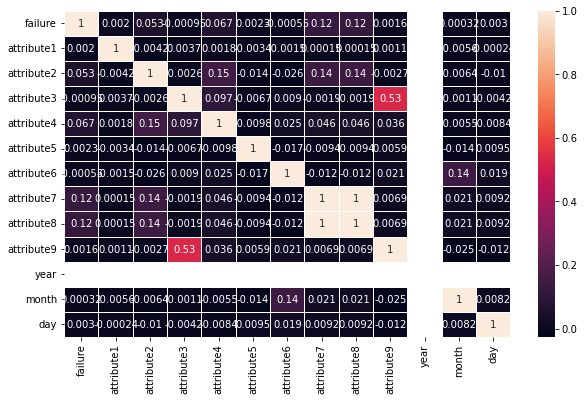

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,linewidths=.5)

In [21]:
(df["attribute7"]==df["attribute8"]).value_counts()

True    124494
dtype: int64

In [22]:
df.year.value_counts() 

8    124494
Name: year, dtype: int64

In [23]:
df.drop(["attribute8","year"],axis=1,inplace=True)

<AxesSubplot:>

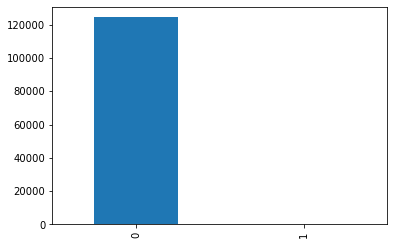

In [24]:
df["failure"].value_counts().plot.bar()

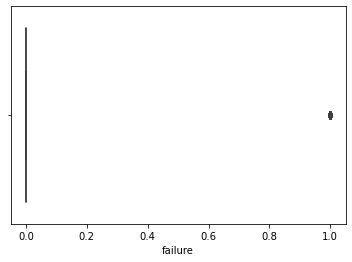

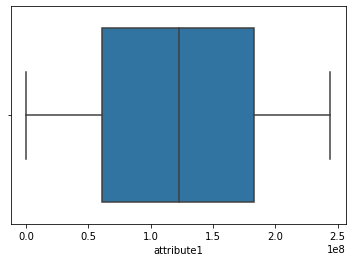

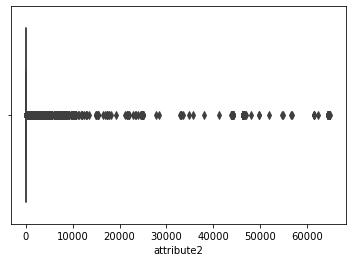

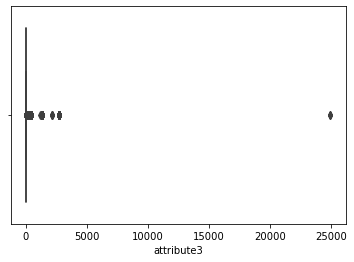

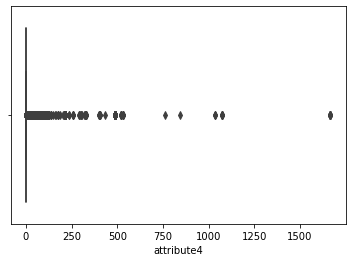

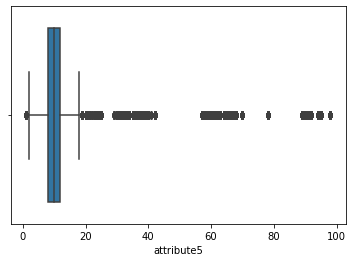

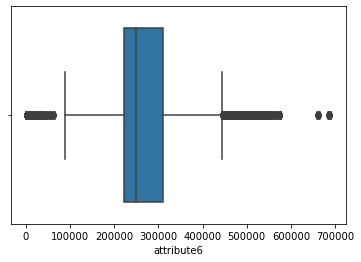

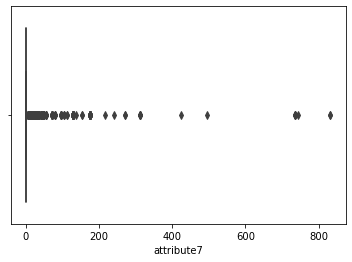

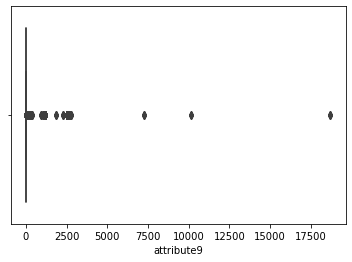

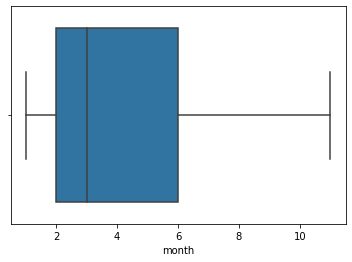

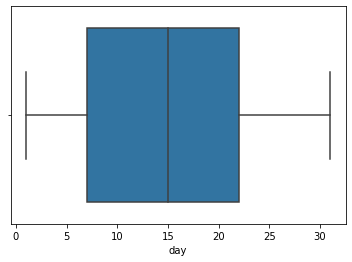

In [28]:
for i in df.select_dtypes(include=np.number):
    sns.boxplot(df[i])
    plt.show()

In [30]:
del df["date"]

In [31]:
df=pd.get_dummies(df,drop_first=True)

In [38]:
x,y=df.drop("failure",axis=1),df["failure"]

In [ ]:
#x=df['attribute1', 'attribute2', 'attribute3', 'attribute4',
 #      'attribute5', 'attribute6', 'attribute7', 'attribute9', 'month']
#y=df["failure"]

In [40]:
x.shape

(124494, 1177)

In [41]:
y.shape

(124494,)

In [42]:
def classification_funct(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier #yüklemek için !pip install xgboost kullandım
    from sklearn.ensemble import GradientBoostingClassifier
    
    import imblearn
    from imblearn.under_sampling import RandomUnderSampler
    from imblearn.metrics import geometric_mean_score, make_index_balanced_accuracy, classification_report_imbalanced

    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
              
    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    G=GradientBoostingClassifier()
      
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=13)
    
    
    algos=[g,b,KN,SVC,D,R,Log,XGB,G]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier','GradientBoostingClassifier']
    
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    
    RUS=RandomUnderSampler(random_state=42)
    x_RUS,y_RUS=RUS.fit_resample(x_train,y_train)
    
    for item in algos:

        #item.fit(x_RUS,y_RUS)
        predict=item.fit(x_RUS,y_RUS).predict(x_test)
        
        
        accuracy_scored.append(accuracy_score(y_test,predict))
        precision_scored.append(precision_score(y_test,predict))
        recall_scored.append(recall_score(y_test,predict))
        f1_scored.append(f1_score(y_test,predict))

    result=pd.DataFrame(columns=['accuracy_score','f1_score','recall_score','precision_score'],index=algo_names)
    result['accuracy_score']=accuracy_scored
    result['f1_score']=f1_scored
    result['recall_score']=recall_scored
    result['precision_score']=precision_scored
    
    return result.sort_values('accuracy_score',ascending=False)  

In [43]:
classification_funct(x,y)

,accuracy_score,f1_score,recall_score,precision_score
GaussianNB,0.990939,0.020833,0.081081,0.011952
BernoulliNB,0.888029,0.015259,0.729730,0.007710
RandomForestClassifier,0.878004,0.013510,0.702703,0.006821
GradientBoostingClassifier,0.871353,0.011846,0.648649,0.005978
DecisionTreeClassifier,0.853939,0.009586,0.594595,0.004832
XGBClassifier,0.830195,0.010855,0.783784,0.005466
SVC,0.645868,0.002895,0.432432,0.001452
KNeighborsClassifier,0.490265,0.002264,0.486486,0.001135
LogisticRegression,0.001189,0.002375,1.000000,0.001189


In [44]:
#Deep Learning ile cozumu

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import geometric_mean_score, make_index_balanced_accuracy, classification_report_imbalanced

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=13)

RUS=RandomUnderSampler(random_state=42)
x_RUS,y_RUS=RUS.fit_resample(x_train,y_train)

In [47]:
model=Sequential()
model.add(Dense(500,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

2023-01-18 11:40:51.054738: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [53]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])
history = model.fit(x_RUS,y_RUS, batch_size=128, epochs=40, verbose=1, validation_data=(x_test,y_test))

Epoch 1/40
2/2 [==============================] - 13s 9s/step - loss: 4050.6394 - accuracy: 0.5435 - val_loss: 0.6372 - val_accuracy: 0.9988
Epoch 2/40
2/2 [==============================] - 4s 4s/step - loss: 1.1868 - accuracy: 0.5000 - val_loss: 0.6655 - val_accuracy: 0.9988
Epoch 3/40
2/2 [==============================] - 6s 6s/step - loss: 13.4014 - accuracy: 0.5000 - val_loss: 0.6682 - val_accuracy: 0.9988
Epoch 4/40
2/2 [==============================] - 5s 5s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 220.3435 - val_accuracy: 0.0133
Epoch 5/40
2/2 [==============================] - 6s 6s/step - loss: 102.8524 - accuracy: 0.5000 - val_loss: 7.4984 - val_accuracy: 0.4171
Epoch 6/40
2/2 [==============================] - 5s 5s/step - loss: 3.6888 - accuracy: 0.5145 - val_loss: 0.6710 - val_accuracy: 0.9988
Epoch 7/40
2/2 [==============================] - 4s 4s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6651 - val_accuracy: 0.9988
Epoch 8/40
2/2 [================

In [54]:
_, accuracy=model.evaluate(x_test, y_test)   #iki digitli gormek icin
print('Accuracy: %.2f' % (accuracy*100))

973/973 [==============================] - 13s 13ms/step - loss: 0.6479 - accuracy: 0.9988
Accuracy: 99.88


In [55]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


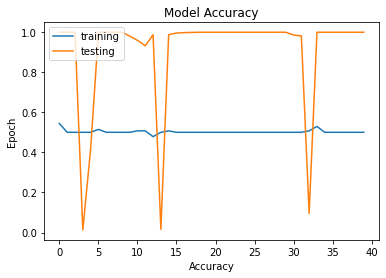

In [56]:
fig1=plt.figure(1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epoch")
plt.legend(["training", "testing"], loc= "upper left")

<function matplotlib.pyplot.show(close=None, block=None)>

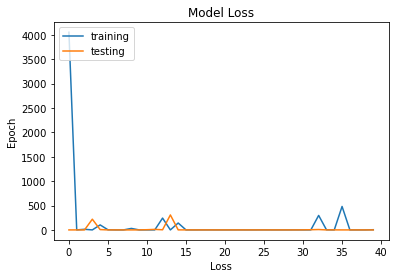

In [57]:
fig1=plt.figure(2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Loss")
plt.ylabel("Epoch")
plt.legend(["training", "testing"], loc= "upper left")

plt.show